# **A2 — Time Series Forecasting Using LSTM**

# 1. Introduction
Time Series Forecasting is one of the most important tasks in machine learning, especially in fields that depend on predicting trends over time such as finance, weather, economics, and transportation forecasting. In this activity, we focus on forecasting monthly airline passenger counts using a Long Short-Term Memory (LSTM) neural network.




The dataset used here is the **International Airline Passengers Dataset**, which contains monthly totals of airline passengers from 1949 to 1960. This dataset is widely used as an introductory benchmark for time series forecasting.





Unlike traditional neural networks, LSTMs are specially designed to capture long-term dependencies in sequential data. As shown in the lesson PDF, LSTMs use:

Cell State (Long-Term Memory) – represented by the green line across units

Hidden State (Short-Term Memory) – represented by the pink line

Sigmoid gates (0 to 1) – controlling what to keep or forget

Tanh activation (-1 to 1) – controlling the input content

Because of these mechanisms, LSTMs can remember information over long periods without suffering from the vanishing or exploding gradient problem common in standard RNNs.


In this notebook, we will:

Load and visualize the airline passenger dataset

Preprocess it for LSTM training

Build and train an LSTM model using TensorFlow Keras

Evaluate predictions against the actual data

# 2. Import Required Libraries
These libraries are necessary for data processing, graph visualization, normalization, and constructing the LSTM neural network. NumPy and pandas manage numerical and tabular data, matplotlib visualizes the dataset, MinMaxScaler normalizes the values for better neural network performance, and TensorFlow Keras provides LSTM layers for model building.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# 3. Load the Dataset
Here we load the airline passenger dataset from an online source. We only need the “Passengers” column for training the network. The dataset contains monthly values from 1949 to 1960, providing a long enough period for the LSTM to detect seasonal patterns and trends.

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, usecols=[1])
df.head()


,Passengers
0,112
1,118
2,132
3,129
4,121


# 4. Visualize the Data
It is essential to visualize time series data before training a forecasting model. The plot helps us understand characteristics such as trend, seasonality, and variance. From the airline passengers graph, you will observe a clear upward trend and recurring peaks every 12 months—indicating yearly seasonality.

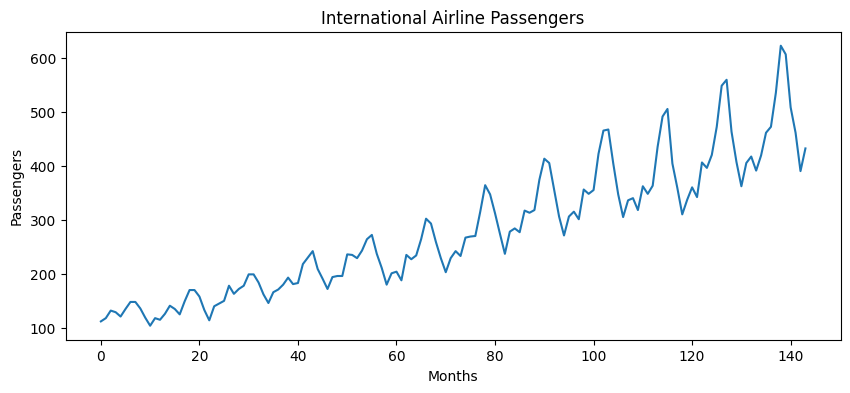

In [3]:
plt.figure(figsize=(10,4))
plt.plot(df)
plt.title("International Airline Passengers")
plt.xlabel("Months")
plt.ylabel("Passengers")
plt.show()


# 5. Normalize the Dataset
LSTMs perform best when input features are normalized. Normalization compresses values into a small, consistent range—typically between 0 and 1. This helps prevent numerical instability and accelerates the learning process. It also aligns well with LSTM activation functions such as sigmoid (0–1) and tanh (−1 to 1).

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df)


# 6. Create Input Sequences for LSTM
LSTMs require sequence data, meaning we must convert the dataset into windows of time. For example, using the previous 12 months to predict the 13th month. This sliding-window approach transforms the time series into supervised learning format, enabling the LSTM to capture temporal relationships.

In [6]:
def create_dataset(data, step=12):
    X, y = [], []
    for i in range(len(data) - step):
        X.append(data[i:i + step, 0])
        y.append(data[i + step, 0])
    return np.array(X), np.array(y)

step = 12
X, y = create_dataset(scaled, step)

X = X.reshape((X.shape[0], X.shape[1], 1))


# 7. Split into Training and Testing Sets
Time series forecasting requires training on past data and testing on future unseen data. We divide the dataset into a 67% training portion and a 33% testing portion to ensure the model learns historical patterns and is then evaluated on future values.

In [7]:
train_size = int(len(X) * 0.67)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# 8. Build the LSTM Model
We construct a Sequential model with a single LSTM layer followed by a Dense output layer. The LSTM architecture consists of forget gates, input gates, output gates, and cell states. These structures allow the model to retain long-term dependencies while processing sequential data.

In [8]:
model = Sequential()
model.add(LSTM(50, input_shape=(step, 1)))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mean_squared_error")
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

# 9. Train the Model
The model is trained for 100 epochs with a batch size of 1. Small batch sizes are often beneficial for time series because they allow the model to update weights more frequently and adapt to the sequential nature of the data.

In [9]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)


Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0198
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0064
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0033
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0042
Epoch 9/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044
Epoch 10/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022
Epoch 11/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0034
Epoch 12/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022
Epoch 13/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024
Epoch 14/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020
Epoch 15/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018
Epoc

# 10. Make Predictions

Using the trained model, we generate predictions for both training and testing sets. The predicted values are then converted back into their original scale using inverse normalization.

In [10]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

actual = scaler.inverse_transform(scaled[step:])


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


# 11. Plot Predictions vs Actual Values

This graph compares the actual time series values with the model’s predictions. It helps visually evaluate whether the model captures the global trend and seasonal cycles. A good LSTM model should follow the general direction and peak pattern of the actual data.

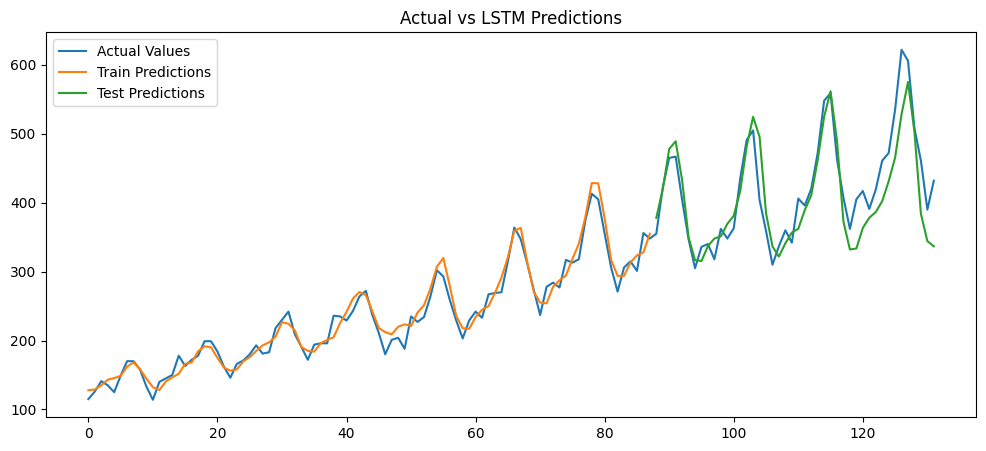

In [11]:
plt.figure(figsize=(12,5))
plt.plot(actual, label="Actual Values")
plt.plot(train_pred, label="Train Predictions")
plt.plot(range(len(train_pred), len(train_pred) + len(test_pred)), test_pred, label="Test Predictions")
plt.title("Actual vs LSTM Predictions")
plt.legend()
plt.show()


# 12. Evaluate Model Performance

We assess the forecasting accuracy using RMSE and MAE. These metrics measure how far the predictions deviate from the actual values. Lower numbers indicate better performance, and they help quantify how well the LSTM learned the temporal structure.

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

rmse = math.sqrt(mean_squared_error(actual, np.vstack((train_pred, test_pred))))
mae = mean_absolute_error(actual, np.vstack((train_pred, test_pred)))

print("RMSE:", rmse)
print("MAE:", mae)


RMSE: 25.309619732181112
MAE: 17.614120078809332
